In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

**Importing the data set**

In [69]:
df = pd.read_csv('///content/drive/MyDrive/Atomcamp/data.csv')
print(df.head())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

**Checking the number of rows and coloumns**

In [70]:
df.shape

(569, 33)

**Checking the data types of columns**

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

**Checking the Null Values**

In [72]:
df.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


**Dropping the id coulumn, empty column because it is not giving any information**

In [73]:
df.drop(['id', 'Unnamed: 32'], axis = 1, inplace = True)

**Checking unique values in categorical coulmn i.e diagnosis**

**We can see that it has two unique values; one is Malignant and the other one is Benign**

**Malignant Means the patient has a Breast Cancer**

**Benign Means the patient does not have a Breast Cancer**

In [74]:
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

**Counting the values of diagnosis**

In [75]:
df['diagnosis'].value_counts()

,count
diagnosis,
B,357
M,212


<ipython-input-76-212629629264>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='diagnosis', data=df, palette='husl')


Text(0, 0.5, 'Count')

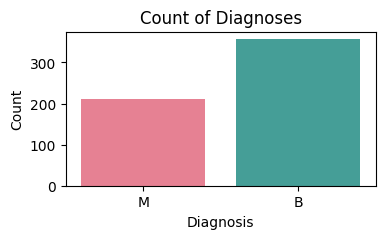

In [76]:
plt.figure(figsize=(4,2))
sns.countplot(x='diagnosis', data=df, palette='husl')
# Adding labels and title
plt.title('Count of Diagnoses')
plt.xlabel('Diagnosis')
plt.ylabel('Count')

**Checking the Statistical information using Describe function**

In [77]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


**Now I will do encoding of categorical column i.e diagnosis**

In [78]:
df['diagnosis']=df['diagnosis'].map({'M':1,'B':0})
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


**Checking the Correlation Heatmap**

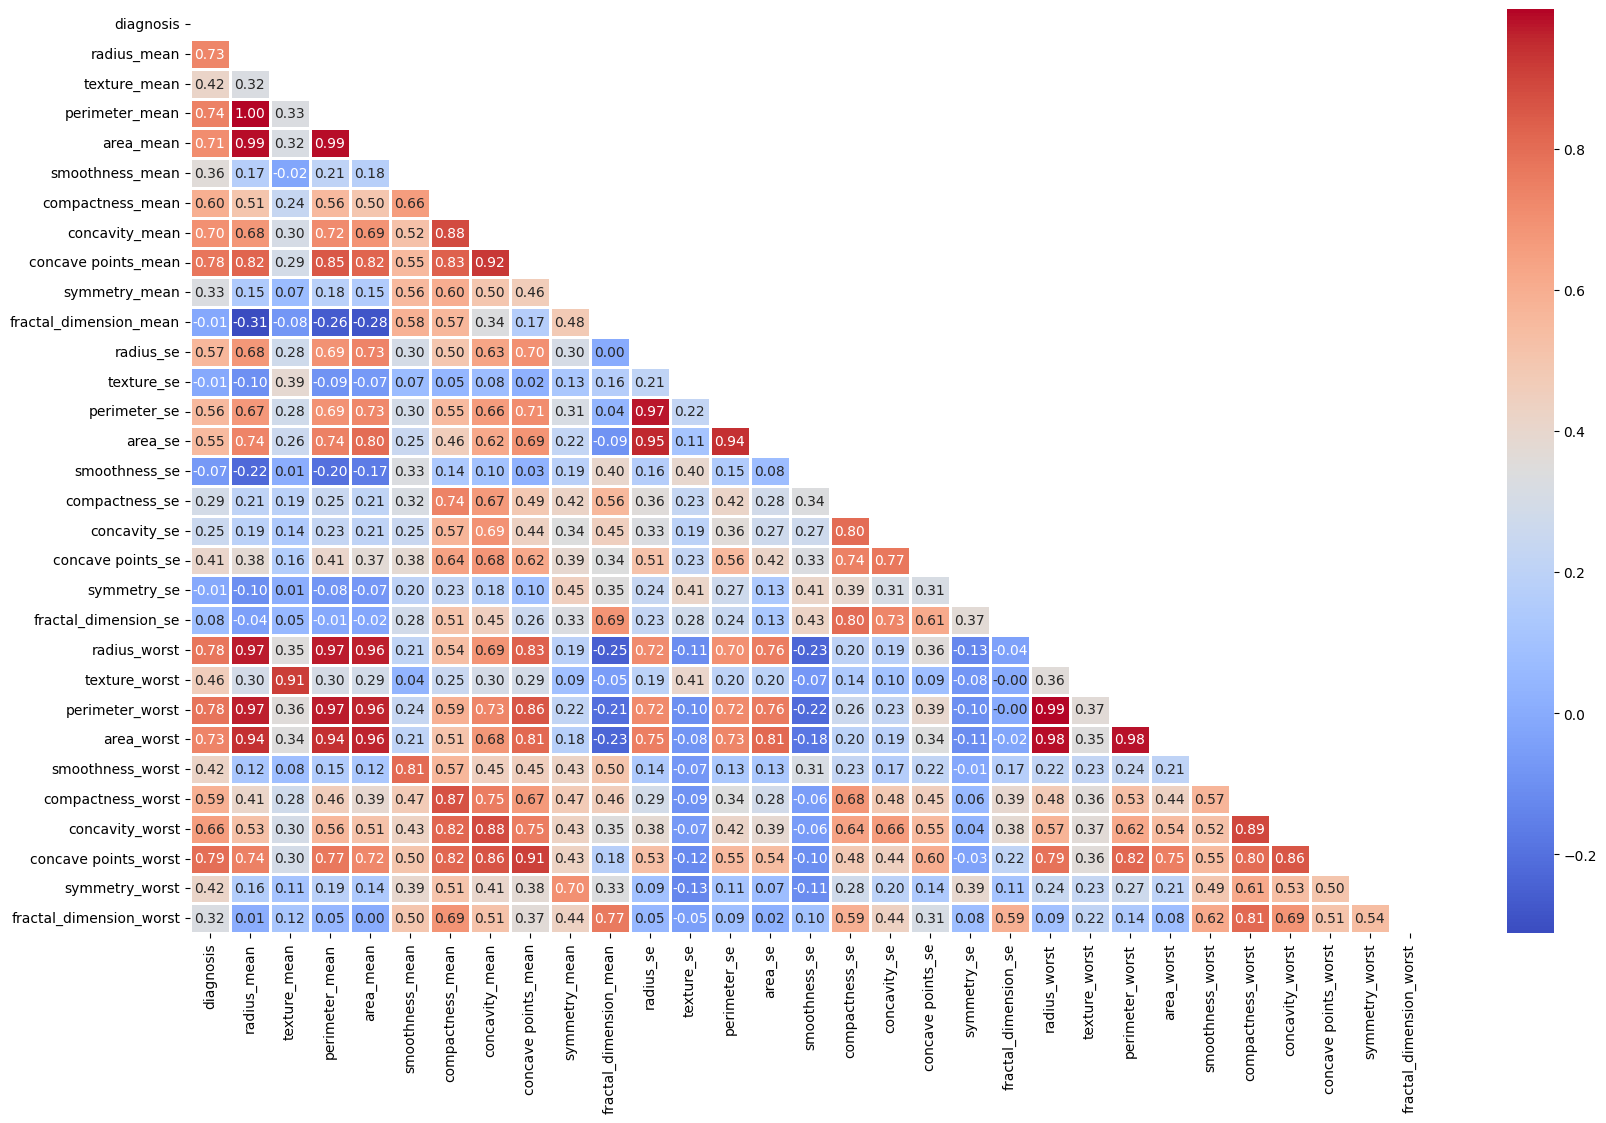

In [79]:
numeric_df = df.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr = numeric_df.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(20, 12))

# Draw the heatmap
sns.heatmap(corr, mask=mask, linewidths=1, annot=True, fmt=".2f", cmap="coolwarm")

# Show the plot
plt.show()

**Creating Histogram to Check diagnosis values after encoding them**

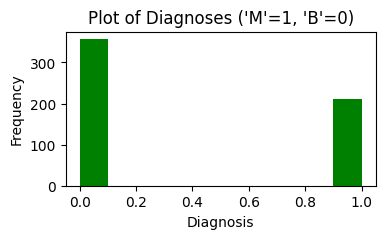

In [80]:
plt.figure(figsize=(4, 2))
plt.hist(df['diagnosis'], color='g')

# Adding labels and title
plt.title("Plot of Diagnoses ('M'=1, 'B'=0)")
plt.xlabel('Diagnosis')
plt.ylabel('Frequency')

# Display the plot
plt.show()

In [81]:
import numpy as np
import pandas as pd

# Assuming numeric_df is already defined and contains the numerical data
# Compute the absolute correlation matrix
corr_matrix = numeric_df.corr().abs()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Apply the mask to get the lower triangle of the correlation matrix
tri_df = corr_matrix.mask(mask)

# Identify features to drop (correlation > 0.92)
to_drop = [x for x in tri_df.columns if any(tri_df[x] > 0.92)]

# Drop highly correlated features from the DataFrame
df = df.drop(to_drop, axis=1)

# Print the number of remaining columns
print(f"The reduced dataframe has {df.shape[1]} columns.")


The reduced dataframe has 23 columns.


In [82]:
df.columns

Index(['diagnosis', 'texture_mean', 'smoothness_mean', 'compactness_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'texture_se', 'area_se', 'smoothness_se', 'compactness_se',
       'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'texture_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [83]:
X = df.drop('diagnosis', axis = 1)
y = df['diagnosis']

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [86]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [87]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [88]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.9590643274853801


In [89]:
y_pred = log_reg.predict(X_test)

In [90]:
print(accuracy_score(y_train, log_reg.predict(X_train)))

log_reg_acc = accuracy_score(y_test, log_reg.predict(X_test))
print(log_reg_acc)

0.9899497487437185
0.9590643274853801


**Building a predictive system**

In [91]:
input_data = (11.42,20.38,77.58,386.1,0.1425,0.2839,0.2414,0.1052,0.2597,0.09744,0.4956,1.156,3.445,27.23,0.00911,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.5,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.173)

In [92]:
# Assuming you need the first 22 features only:
input_data_22 = input_data[:22]  # Select the first 22 features

# Convert input data to NumPy array
input_data_np = np.asarray(input_data_22)

# Reshape the input data as we're predicting for only one instance
input_data_reshaped = input_data_np.reshape(1, -1)

# Apply the same scaler transformation
input_data_scaled = scaler.transform(input_data_reshaped)

# Make the prediction
prediction = model.predict(input_data_scaled)

# Check the result
if prediction[0] == 1:
    print("The tumor is malignant.")
else:
    print("The tumor is benign.")


The tumor is malignant.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [93]:
joblib.dump(model,"Breast_Cancer_Detection.pkl")

['Breast_Cancer_Detection.pkl']

In [94]:
model = joblib.load("/content/Breast_Cancer_Detection.pkl")


In [95]:
!pip install fastapi uvicorn joblib scikit-learn



In [106]:
!pip install fastapi uvicorn pyngrok joblib
!pip install nest_asyncio
!pip install uvicorn

In [ ]:
ngrok kill

In [ ]:
from fastapi import FastAPI
import uvicorn
from pyngrok import ngrok
from pydantic import BaseModel
import joblib
import pandas as pd
from pyngrok import ngrok
import nest_asyncio
nest_asyncio.apply()


# Set the ngrok authtoken
ngrok.set_auth_token("2mbb2ncD4YjyCdgXGvaJ2ni7LkF_63d8U2bfzPNPXEAHLhZJs")

# Start ngrok tunnel to expose the app
public_url = ngrok.connect(8000)
print(f"Public URL: {public_url}")

# Initialize the FastAPI app
app = FastAPI()

# Load the pre-trained model
model = joblib.load("/content/Breast_Cancer_Detection.pkl")

# Define the input schema for the API using Pydantic
class BreastCancerInput(BaseModel):
    texture_mean: float
    smoothness_mean: float
    compactness_mean: float
    concave_points_mean: float
    symmetry_mean: float
    fractal_dimension_mean: float
    texture_se: float
    area_se: float
    smoothness_se: float
    compactness_se: float
    concavity_se: float
    concave_points_se: float
    symmetry_se: float
    fractal_dimension_se: float
    texture_worst: float
    area_worst: float
    smoothness_worst: float
    compactness_worst: float
    concavity_worst: float
    concave_points_worst: float
    symmetry_worst: float
    fractal_dimension_worst: float

# Define the prediction endpoint
@app.post("/predict")
def predict_cancer(data: BreastCancerInput):
    # Convert input data to a DataFrame
    input_data = pd.DataFrame([data.dict().values()], columns=data.dict().keys())

    # Perform prediction
    prediction = model.predict(input_data)

    # Return the result
    if prediction[0] == 0:
        return {"prediction": "Benign"}
    else:
        return {"prediction": "Malignant"}

# Optional: Add a root endpoint to check if the API is running
@app.get("/")
def read_root():
    return {"message": "Breast Cancer Detection API is running."}
# Start ngrok tunnel to expose the app
ngrok_tunnel = ngrok.connect(8000)
print('Public URL:', ngrok_tunnel.public_url)
nest_asyncio.apply()
uvicorn.run(app, port=8000)


Public URL: NgrokTunnel: "https://7cd3-35-233-239-196.ngrok-free.app" -> "http://localhost:8000"
Public URL: https://bae9-35-233-239-196.ngrok-free.app


INFO:     Started server process [2027]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)


INFO:     139.135.45.44:0 - "GET / HTTP/1.1" 200 OK
INFO:     139.135.45.44:0 - "GET /cart.json HTTP/1.1" 404 Not Found
INFO:     139.135.45.44:0 - "GET /favicon.ico HTTP/1.1" 404 Not Found
